In [1]:
import sys
sys.path.append("..")
#import matplotlib
#%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import numpy as np
from LowLevelModules.ImportSDT import SdtFile
from LowLevelModules.GeneralFunctions import get_work_dir, prettify_plot
import ipywidgets as widgets
from IPython.display import display

class MyPlot:
    def __init__(self, nl, nr, fs=(8,6), xlabel='', ylabel=''):
        self.fig, self.ax = plt.subplots(nl, nr, figsize=fs)
        self.ax.set_xlabel(xlabel, labelpad=15, fontsize=22)
        self.ax.set_ylabel(ylabel, labelpad=15, fontsize=22)
        self.ax.tick_params(direction='in', axis='both', labelsize=18, pad=5, length=6, width=1)
        plt.tight_layout()
    
    def xlim(self, x0=None, xf=None):
        if x0 is not None:
            self.ax.set_xlim([x0, xf])
        else:
            x_lim = self.ax.get_lines()[0].get_xdata()
            self.ax.set_xlim([x_lim[0], x_lim[-1]])
    
    def plot(self, x, y, mc, **kwargs):
        self.ax.plot(x, y, mc, **kwargs)
        self.xlim()
        plt.tight_layout()
    
    def semilogy(self, x, y, mc, **kwargs):
        self.plot(x, y, mc, **kwargs)
        self.ax.set_yscale('log')
#         self.ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#         self.ax.get_yaxis().set_tick_params(labelsize=18)

def g2(t, t0, tau, N):
    return (N-1)/N + 1/N*(1-np.exp(-abs(t-t0)/tau))

wdir = r"Z:\Projects\WSe2\2020\02 february\20200217 - WSe2hBN wrinkle\5K data\g2"

filenames = [f[:-4] for f in os.listdir(wdir) if '.sdt' in f]
file_choice = widgets.RadioButtons(options=filenames,
                                     value=filenames[0],
                                     description='file')
display(file_choice)

RadioButtons(description='file', options=('g2_200nW_area2_pos2', 'g2_200nW_area4_pos2', 'g2_2uW_area2_pos2', '…

42568.0 41856.0


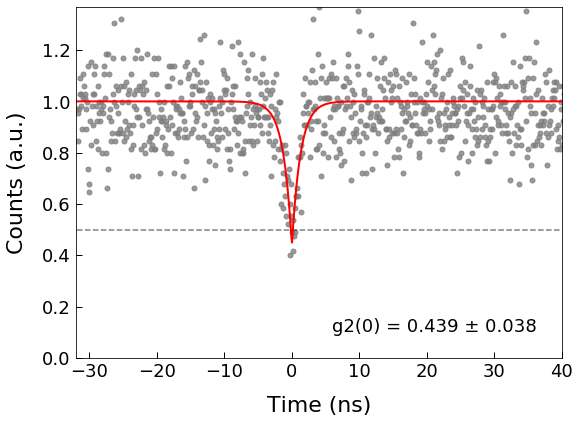

In [2]:
sdt = SdtFile(wdir + "//" + file_choice.value + '.sdt')
delay = -40.71
times = sdt.times[0]
info = sdt.measure_info[0]
x = times*1e9 + delay
y = sdt.data[0][0]
dt_bin= (times[-1]-times[0])/(len(times)-1)

#trim data
x = x[y>0]
y = y[y>0]

#ct_rate1
info_ctr = info['StopInfo']
min_ctr11 = info_ctr['min_sync_rate'][0]
min_ctr12 = info_ctr['min_cfd_rate'][0]
min_ctr13 = info_ctr['min_tac_rate'][0]
max_ctr11 = info_ctr['max_sync_rate'][0]
max_ctr12 = info_ctr['max_cfd_rate'][0]
max_ctr13 = info_ctr['max_tac_rate'][0]
col_t = info_ctr['stop_time'][0]

Ct_rate_APD1 = (min_ctr12 + max_ctr12) / 2
Ct_rate_APD2 = (min_ctr11 + max_ctr11) / 2
print(Ct_rate_APD1, Ct_rate_APD2)
#normalization
norm = float(Ct_rate_APD1 * Ct_rate_APD2 * dt_bin * col_t)

#y = np.divide(y, np.mean(y[656:]), casting="unsafe")
y = np.divide(y, norm, casting="unsafe")
pl = MyPlot(1, 1, xlabel='Time (ns)', ylabel='Counts (a.u.)')
pl.plot(x, y, 'o', markersize=5, c='grey', alpha=0.8)
pl.plot([x[0], x[-1]], [0.5, 0.5], 'k--', alpha=.5)

#do the fit
coeffs, pcov = curve_fit(g2, x, y)
perr = np.sqrt(np.diag(pcov))
g20 = 1-1/coeffs[2]
perr_g2 = g20 * perr[2] / coeffs[2]
y_arrf = g2(x, *coeffs)
pl.plot(x, y_arrf, 'r-', linewidth=2)

pl.ax.set_xlim([-32, 40])
pl.ax.set_ylim([0, np.max(y)])
pl.ax.text(6, 0.1, f"g2(0) = {np.round(g20, 3)} ± {np.round(perr_g2, 3)}", fontsize=18)
pl.fig.savefig(wdir + "//" + file_choice.value + '.png', format='png', bbox_inches='tight')


In [54]:
info

rec.array([(b'17:32:59', b'2020-02-18', b'3C0489', 0, -262.7451, 80., -5.2913384, 5., -5.2913384, 1, 4., 8.5159184e-07, 9, 49.80392, 7.0588236, 90.588234, 1024, 0, 1, 1, 1, 7000., 7000., 1, 78, 0, 1, 0., 128, 1, 0, b'SPC-130', -39.215687, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0., 0, 16, 0, 0, 0, 0, 0, 0, 130, 777, 0., 0, 1, (16, 32768, 395.16763, 1, 1, 1, 29440., 29728., 26480., 48., 54272., 55408., 46576., 192., 0, 0.), (0, 0, 0, 0., 0, 0, 0., 0, 0, 0, 0, 0, 0), 0, 0, 0, 0, 0, 0, 0, 0, 0, (0., 0., 0, 0, 0., 0))],
          dtype=[('time', 'S9'), ('date', 'S11'), ('mod_ser_no', 'S16'), ('meas_mode', '<i2'), ('cfd_ll', '<f4'), ('cfd_lh', '<f4'), ('cfd_zc', '<f4'), ('cfd_hf', '<f4'), ('syn_zc', '<f4'), ('syn_fd', '<i2'), ('syn_hf', '<f4'), ('tac_r', '<f4'), ('tac_g', '<i2'), ('tac_of', '<f4'), ('tac_ll', '<f4'), ('tac_lh', '<f4'), ('adc_re', '<i2'), ('eal_de', '<i2'), ('ncx', '<i2'), ('ncy', '<i2'), ('page', '<u2'), ('col_t', '<f4'), ('rep_t', '<f4'), ('stopt', '<i2'), ('overfl', 'u1'), ('use_mo

In [53]:
0.056*7000

392.0